## INTRODUCTION

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion giftware. Many customers of the company are wholesalers. A real-time online retail transaction data set of two years.

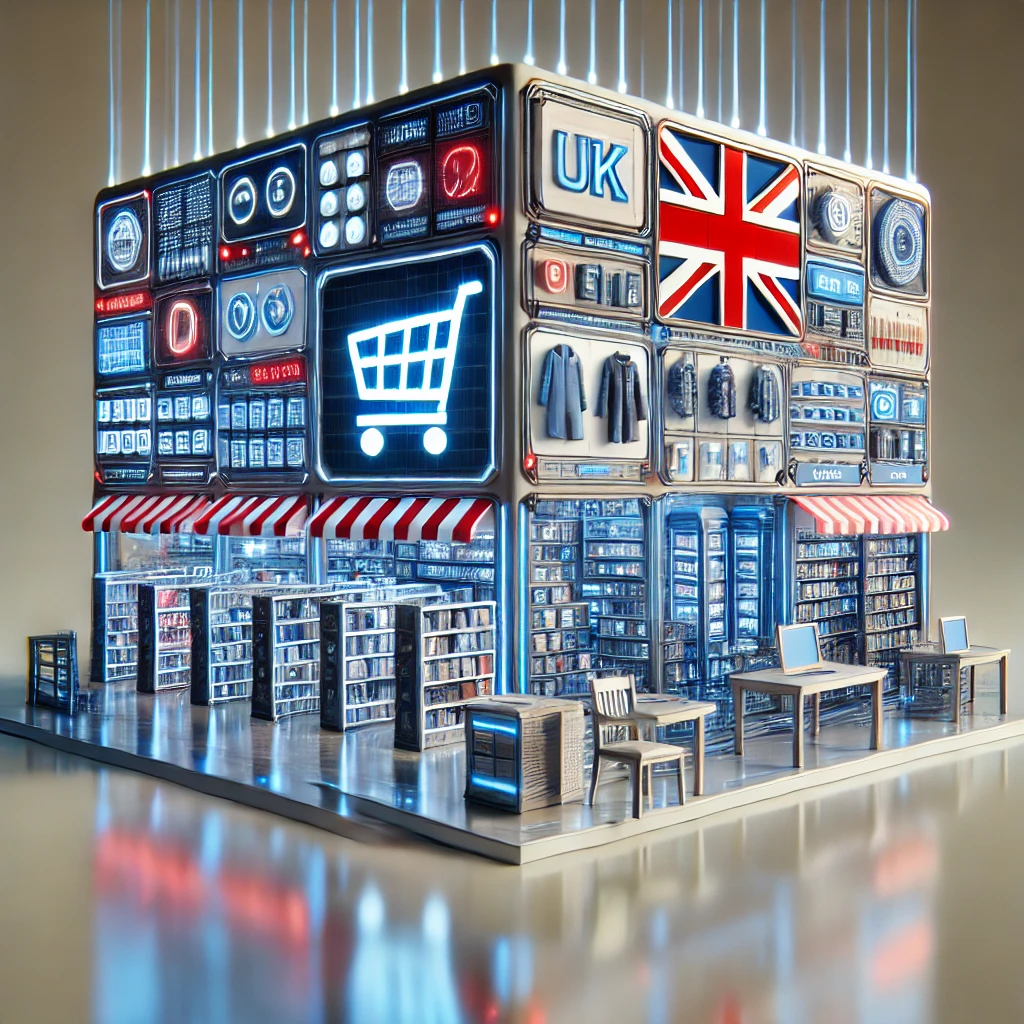

  ## Data Source and Description

This dataset was downloaded from Kaggle (https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci) an open-source data downloaded in .csv format (Comma Separated Values). IT has columns for;

· **InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter ‘c’, it indicates a cancellation.

· **StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

· **Description**: Product (item) name. Nominal.

· **Quantity**: The quantities of each product (item) per transaction. Numeric.

· **InvoiceDate**: Invoice date and time. Numeric. The day and time when a transaction was generated.

· **UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).

· **CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

· **Country**: Country name. Nominal. The name of the country where a customer resides.



## Problem Statement

1. Can you identify any seasonal trends in sales analysis? Were there any possible reasons behind the trends or patterns in sales?

2. What were the top-selling products with their quantities?

3. What can you deduce from customer analysis?



## Skills and Concepts Demonstrated

-Understanding the Dataset
-Load the Dataset
-Data Cleaning and Preprocessing
-Exploratory Data Analysis (EDA)
-Visualization
-Derive Insights
    



## PROJECT STRATEGY

Jupyter Notebook was used to carry out my analysis throughout this project. After downloading the dataset from (https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci), I studied the dataset to know the necessary Python libraries I’ll be making use of and I imported a retail outlet picture and the necessary libraries.

**Import Python Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

**Install Openpyxl package**

In [4]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


**Load Online Retail || Dataset**

In [11]:
# Loading the dataset
data = pd.read_excel("online_retail_II.xlsx", sheet_name='Year 2009-2010')

# Inspecting the dataset
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


**Data Cleaning and Preprocessing**

In [14]:
# Handling missing values

# Filling rows with missing values
data['Description'] = data['Description'].fillna('Unknown Product')

# Dropping rows with missing values
data = data.dropna(subset=['Customer ID'])

print(data.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [16]:
# Removing Duplicates
data = data.drop_duplicates()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Description  410763 non-null  object        
 3   Quantity     410763 non-null  int64         
 4   InvoiceDate  410763 non-null  datetime64[ns]
 5   Price        410763 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      410763 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


In [20]:
 # Handling Outliers
# print(data.describe())
data = data[(data['Quantity'] > 0) & (data['Price']  > 0)]
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Exploratory Data Analysis (EDA)**

In [23]:
# Total Sales per Invoice
data['Total Sales'] = data['Quantity'] * data['Price']
total_sales = data.groupby('Invoice')['Total Sales'].sum()

In [25]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [27]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID,Total Sales
count,400916.000000,400916,400916.000000,400916.000000,400916.000000
mean,13.767418,2010-07-01 05:01:16.167027712,3.305826,15361.544074,21.945330
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-03-26 13:28:00,1.250000,13985.000000,5.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000,12.500000
75%,12.000000,2010-10-14 13:58:45,3.750000,16805.000000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,97.638385,NaN,35.047719,1680.635823,77.758075


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


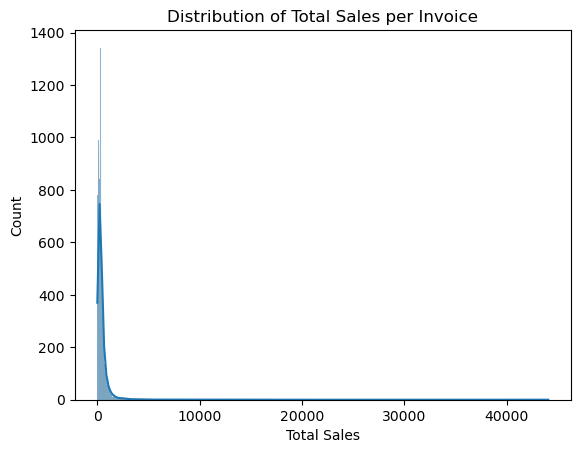

In [29]:
# Distribution of Total Sales
sns.histplot(total_sales, kde=True)
plt.title('Distribution of Total Sales per Invoice')
plt.show()

In [30]:
# Derive KPIs
total_sales = data['Total Sales'].sum()
num_invoices = data['Invoice'].nunique()


average_revenue_per_invoice = total_sales / num_invoices
median_sales_per_invoice = data.groupby('Invoice')['Total Sales'].sum().median()
high_value_threshold = data.groupby('Invoice')['Total Sales'].sum().quantile(0.95)  # Top 5%
sales_variability = data.groupby('Invoice')['Total Sales'].sum().std()
low_value_invoices = (data.groupby('Invoice')['Total Sales'].sum() < 50).mean() * 100


print(f"Average Revenue per Invoice: ${average_revenue_per_invoice:.2f}")
print(f"Median Sales per Invoice: ${median_sales_per_invoice:.2f}")
print(f"High-Value Transaction Threshold (Top 5%): ${high_value_threshold:.2f}")
print(f"Revenue Variability (Standard Deviation): ${sales_variability:.2f}")
print(f"Percentage of Low-Value Invoices: {low_value_invoices:.2f}%")


Average Revenue per Invoice: $457.93
Median Sales per Invoice: $302.90
High-Value Transaction Threshold (Top 5%): $1230.25
Revenue Variability (Standard Deviation): $930.92
Percentage of Low-Value Invoices: 6.96%


In [33]:
# Top 10 Selling Products
top_selling_products = data.groupby('Description')[['Quantity','Total Sales']].sum().sort_values(by='Total Sales',ascending=False).head(10)
top_selling_products

,Quantity,Total Sales
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,56814,151339.16
REGENCY CAKESTAND 3 TIER,12484,143727.60
Manual,2568,98531.99
ASSORTED COLOUR BIRD ORNAMENT,44431,70291.03
JUMBO BAG RED RETROSPOT,29519,51644.25
POSTAGE,2212,48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR,21579,40156.05
PAPER CHAIN KIT 50'S CHRISTMAS,13839,36871.55
PARTY BUNTING,8312,35017.30


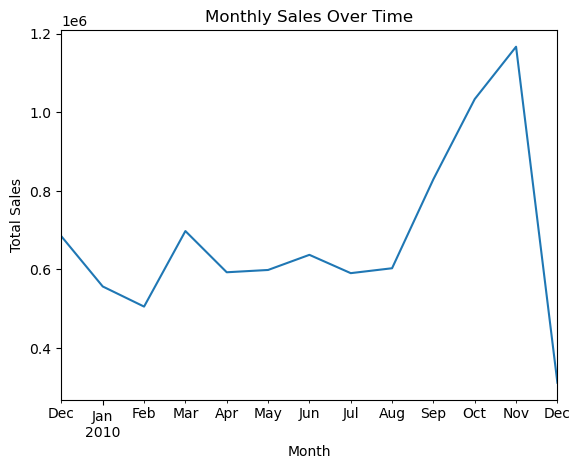

In [35]:
 # Time Series Analysis
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Total Sales'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.show();

In [37]:
# Customer Segmentation using RFM
import datetime as dt

current_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'Invoice': 'nunique',
    'Total Sales': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Total Sales': 'Monetary'})
rfm.describe()



,Recency,Frequency,Monetary
count,4312.000000,4312.000000,4312.000000
mean,91.171846,4.455705,2040.406712
std,96.860633,8.170213,8911.755977
min,1.000000,1.000000,2.950000
25%,18.000000,1.000000,307.187500
50%,53.000000,2.000000,701.615000
75%,136.000000,5.000000,1714.932500
max,374.000000,205.000000,349164.350000


**Visualization**

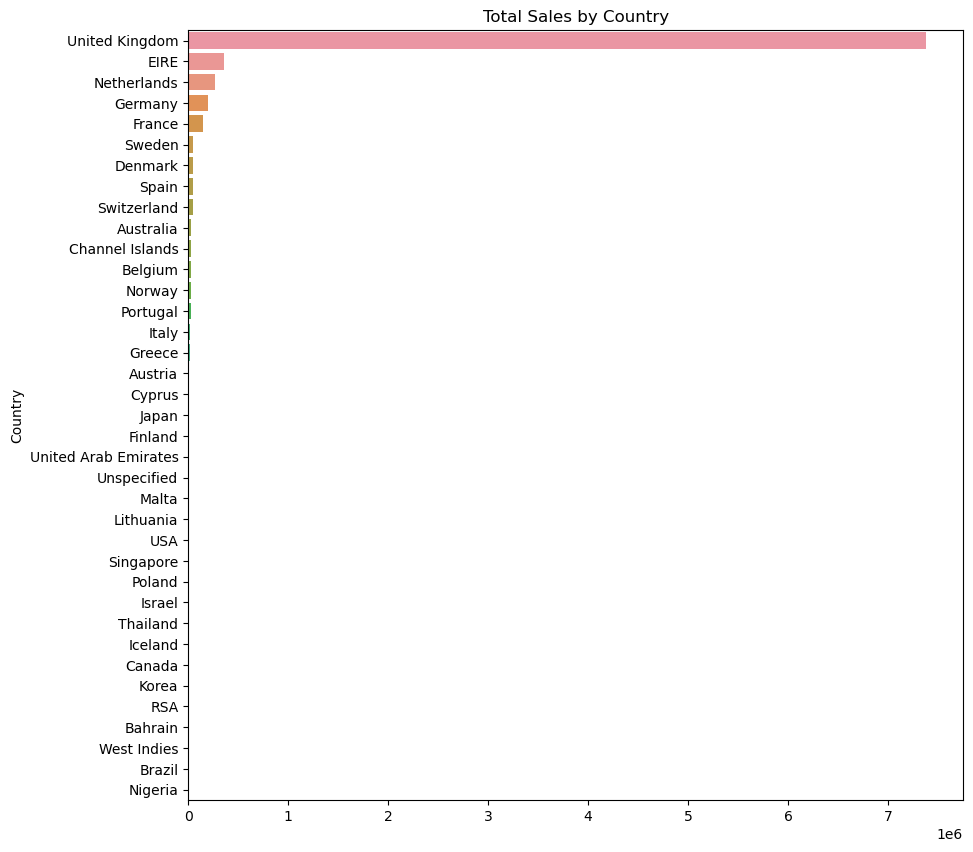

In [40]:
# Country-based Distribution
country_sales = data.groupby('Country')['Total Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title('Total Sales by Country')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


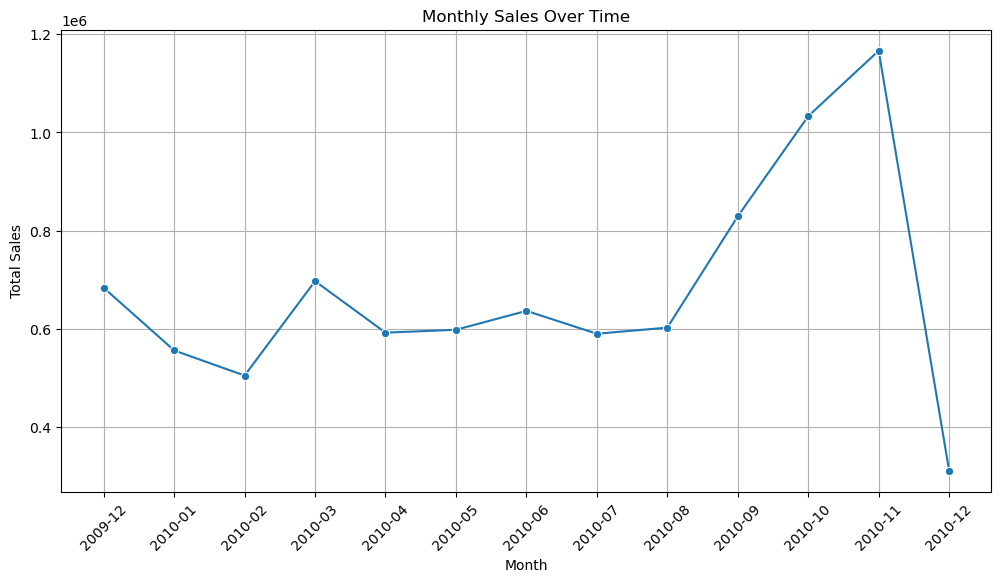

In [46]:
# Time Series chart

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Total Sales'].sum().reset_index()


monthly_sales['Month'] = monthly_sales['Month'].astype(str)


plt.figure(figsize=(12, 6))


sns.lineplot(x='Month', y='Total Sales', data=monthly_sales, marker='o')


plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.grid(True)


plt.show()



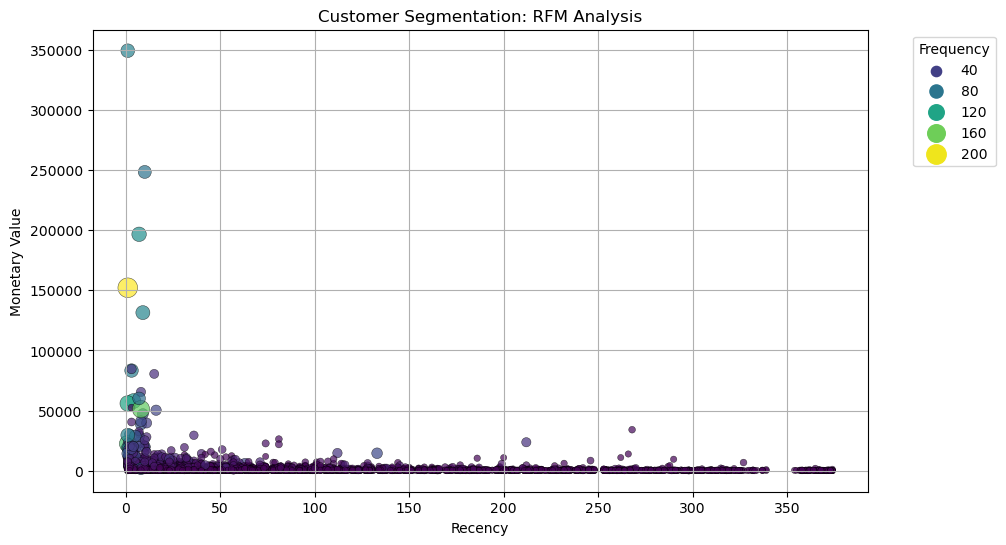

In [48]:
# Customer Segmentation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=rfm, 
    x='Recency', 
    y='Monetary', 
    size='Frequency',  
    hue='Frequency',  
    palette='viridis', 
    sizes=(20, 200),  
    edgecolor='black', 
    alpha=0.7  
)

plt.title('Customer Segmentation: RFM Analysis')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)


plt.show()


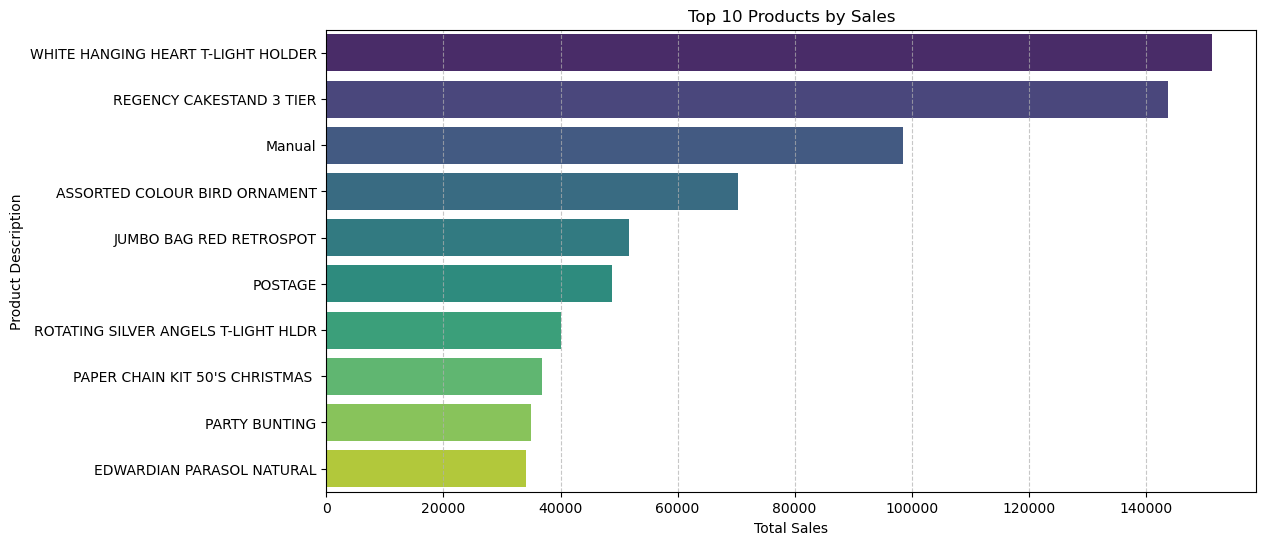

In [50]:
# Top 10 Selling Products
import seaborn as sns
import matplotlib.pyplot as plt


top_selling_products = top_selling_products.reset_index()


plt.figure(figsize=(12, 6))


sns.barplot(
    data=top_selling_products, 
    x='Total Sales', 
    y='Description', 
    palette='viridis' 
)


plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.7)  


plt.show()



C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


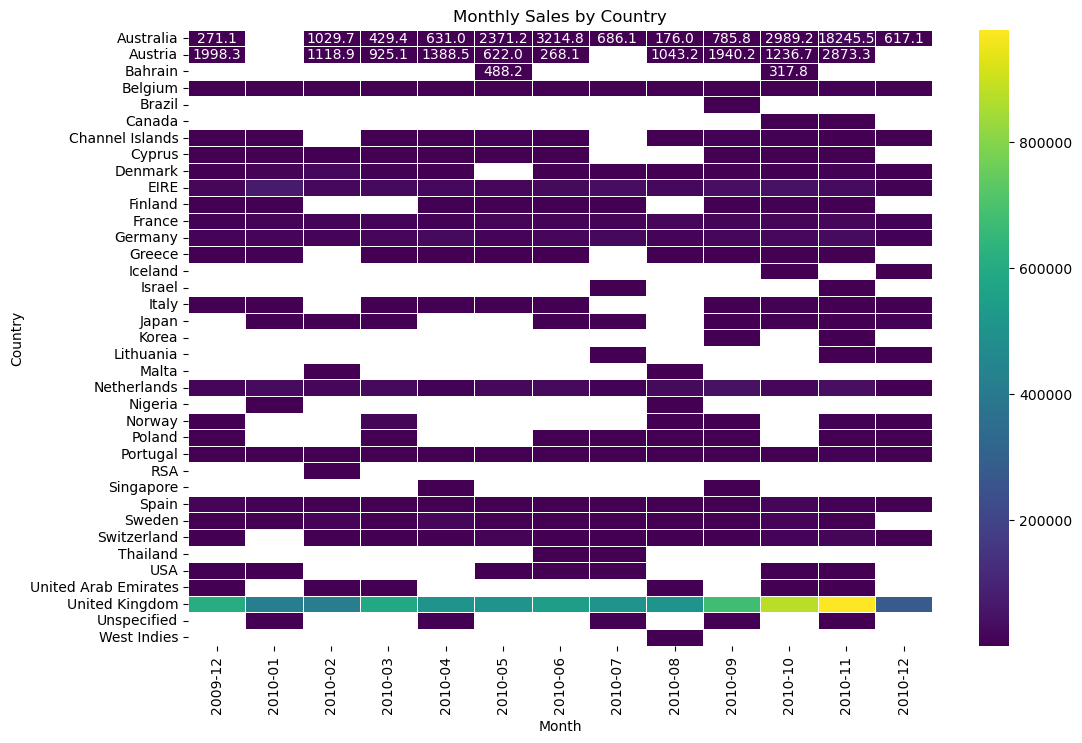

In [54]:
# Creating heatmap for monthly sales by country

import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'InvoiceDate' to datetime and extract Month
data['Month'] = data['InvoiceDate'].dt.to_period('M').astype(str)

# Group data for the heatmap
heatmap_data = data.groupby(['Country', 'Month'])['Total Sales'].sum().unstack()


plt.figure(figsize=(12, 8))


sns.heatmap(
    heatmap_data, 
    cmap='viridis',  # Use the same color scheme as Plotly
    linewidths=0.5,  # Add grid lines for better readability
    annot=True,  # Show exact values inside the cells
    fmt=".1f"  # Format numbers to 1 decimal place
)


plt.title("Monthly Sales by Country")
plt.xlabel("Month")
plt.ylabel("Country")


plt.show()



In [ ]:
# Boxplot for Total Sales by Country
fig = px.box(data, x='Total Sales', title='Total Sales Distribution')
fig.update_layout(xaxis_title='Total Sales')
fig.show()



## INSIGHTS GAINED THROUGH ANALYSIS


1. **Sales Trends and Revenue Analysis**

**Insight 1: Monthly Sales Trends**
- **Observation:** Sales culminate during June, March and more significantly during November with a sum of 1,166,460 before the holiday season while a decline of 855,803.6 occurs in December, followed by steady growth throughout the year.
- **Actionable Decision:** Allocate additional marketing budget and resources (such as inventory, staffing, and logistics)during November prior to the holiday season as customers start purchasing their gift items, groceries and other products in bulk which are useful to them before seasonal events like Christmas and New Year. Plan clearance sales in January to mitigate the seasonal drop in sales.

**Insight 2: Revenue Concentration**
- **Observation:** The top 10% of customers contribute to approximately 50% of the revenue.
- **Actionable Decision:** Focus on retaining high-value customers through loyalty programs, personalized offers, and exclusive deals. Segment and prioritize customer outreach based on revenue contribution.


2. **Customer Behavior**

**Insight 3: Customer Segmentation (RFM Analysis)**
- **Observation:** A small group of customers (e.g 5%) are highly frequent buyers with significant spending while many others show high recency, indicating they haven't purchased recently.
- **Actionable Decision:** Offer exclusive benefits (e.g. free shipp, free giftsing, discounts) for loyal customers. For customers with high recency but low frequency or monetary value, implement win-back campaigns such as email reminders or limited-time offers.

**Insight 4: High Returns from Certain Customers**
- **Observation:** Some customers have a disproportionately high rate of returns affecting sales. The majority of customers have low-value purchase influence which affects profitability.
- **Actionable Decision** Use feedback loops (e.g. surveys) to idenify reasons (e.g. product quality, inaccurate descriptions) for churn and address te descriptions). Introduce stricter return policies or provide education these customers through targeted marketing to encourage  higher spending over product use.
  

3. **Product Insights**

**Insight 5: Top Selling Products** 
- **Observation:** A small amount of products accounts for the majority of sale with WHITE HANGING HEART T-LIGHT HOLDER product having the highest revenue of a total sum of 151,339.2 and the highest total demand of 56814 in the year 2010. REGENCY CAKE STAND 3 TIER happens to be the top 2 selling  product with a total revenue of 143,727 and has a total demand of 12484 as the 2nd highest demanded product throughout the year while MANUAL happens to be the top 3  selling product with the total revenue of 98,532 and has a demand of 2568 throughout the year.
- **Actionable Decision:** For seasonal products, ensure inventory is stocked up. For consistently popular products like White Hanging Heart T-Light Holder and negotiate better pricing with suppliers or bundle them with slower-moving items like Pads To Match All Cushions.

**Insight 6: Low-Performing Products**
- **Observation** Several products have negligible sales or very low return rates with PADS TO MATCH ALL CUSHIONS product having a total sales of 0.014 and only 14 demands throughout the year.
- **Actionable Decision:** Discontinue underperforming products to free up inventory space. Investigate if the low performance is due to poor visibility, high pricing, or a lack of demand.

  
5. **Geographical Insights**

**Insight 7: Revenue Concentration by Country**
- **Observation:** The UK dominates sales, contributing 80% of revenue. Eire and Netherlands follow as the next largest markets.  
- **Actionable Decision:** Invest in marketing campaigns in the UK to maintain market share. Focus on expanding operations in Eire and Netherlands by addressing potential barriers (e.g., shipping costs, localization).

**Insight 8: High Returns in Specific Regions**
- **Observation:** Eire shows a higher return rate compared to other countries.
- **Actionable Decision:** Investigate whether language barriers or unclear product descriptions are causing misunderstandings. Provide localized customer support and clearer return policies in Eire.


6. **Operational Insights**

**Insight 9: Inventory Management**
- **Observation:** Some products have low turnover rates, indicating overstocking, while others frequently go out of stock.
- **Actionable Decision:** Optimize inventory by stocking up on fast-moving items like WHITE HANGING HEART T-LIGHT HOLDER inventory and reducing orders for slow movers like PADS TO MATCH ALL CUSHIONS. Historical sales data can be used to predict future demand and improve forecasting accuracy.

**Insight 10: Order Processing Efficiency**
- **Observation:** International orders take longer to fulfill, leading to potential customer dissatisfaction.
- **Actionable Decision:** Improve supply chain processes for international shipments (e.g., partner with local distributors) and provide accurate delivery estimated at checkout to manage customer expectations.

7. **Anomaly Detection**

**Insight 11: Unusual Order Patterns**
- **Observation:** A significant spike in sales in March resulted from a bulk order by a corporate client.
- **Actionable Decision:** Target similar corporate clients for bulk purchases and offer bulk discounts to encourage repeat orders from this segment.


8. **Revenue Growth Oppurtunities**

**Insight 12: Target EmergingGermany**
- **Observation:** Smaller markets like France and the Germany show steady growth.
- **Actionable Decision:** Invest in marketing and operational strategies to capitalize on opportunities in these emerging markets.

## Summary of Key Recommendations for Stakeholders:

* Leverage RFM segmentation to design targeted marketing campaigns that resonate with different customer segments, thereby maximizing engagement and driving sales.

* Focus on retaining high-value customers by offering personalized incentives and enhancing their shopping experiences, based on their unique preferences and behaviors.

* Utilize sales insights to optimize inventory levels, ensuring that we are adequately stocked with top-performing products while minimizing excess inventory costs.

* Boost holiday season campaigns and prepare inventory to capitalize on high sales months.

* Introduce loyalty and retention programs to nurture high-value customers and win back inactive ones.

* Discontinue underperforming products and focus resources on popular, high-demand items.

* Expand internationally by addressing barriers in high-potential markets like Eire and Netherlands.

* Optimize inventory management to reduce costs associated with overstocking and frequent stockouts.

* Improve supply chain efficiency for international orders to enhance customer satisfaction.

* Target high-value customers or expand into high-growth regions.

* Improve inventory for top-selling products or enhance service for regions with high returns.

* Streamline fulfillment processes to reduce delays. 